# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: Sep 25 (Friday) 11:00 pm </b> </font>


<font color="blue"> Sreekar Nedunuri, St ID: 801167891 </font>

# I. Overview

In this assignment, you are getting familiar to the tools including Python, numpy, matplotlib, pandas, and Jupyter notebook. Search for data, one for classification and one for regression from any data source. 
The data should to be large enough more than 10,000 samples and more than 10 feature values. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine without any error. 
**You don't need to run any ML algorithm.** 
This assignment only asks reading, visualizing, and writing your observations from it.

**Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing.** 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data and Visualization | 
 | 10| Introduction of data for regression & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 10| Introduction of data for Classification & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 



## II.1. Classification Data Analysis

#### The data chosen is from a marketing campaign of portugese bank institution. Here they are determining if user has subscribed to term deposit or not. The data comprised of 45,211 records. 12,546 records were considered for this assignment. 

#### It has 17 attributes associated with it comprising of both integer and object type data. it has no nulls, it has few special characters for few values of a column.

#### Output Variable:
    Y - has the client subscribed a term deposit? (binary: "yes","no")

#### Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
# Importing necessary libraries for assignment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Reading csv data using pandas

bank = pd.read_csv("bank-full.csv")

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,49,blue-collar,married,primary,no,126,no,no,unknown,3,jul,60,1,-1,0,unknown,no
12541,35,blue-collar,married,unknown,no,-400,yes,yes,unknown,3,jul,85,1,-1,0,unknown,no
12542,57,retired,married,secondary,no,91,no,yes,unknown,3,jul,256,3,-1,0,unknown,no
12543,53,services,divorced,secondary,yes,0,no,yes,unknown,3,jul,172,10,-1,0,unknown,no


In [5]:
# we can observe that contact has unknown value associated with it
bank.contact.unique()

array(['unknown'], dtype=object)

In [6]:
## All values in above attibute are unknown, we can remove it as it will not effect the model
bank = bank.drop("contact",axis=1)

In [7]:
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,49,blue-collar,married,primary,no,126,no,no,3,jul,60,1,-1,0,unknown,no
12541,35,blue-collar,married,unknown,no,-400,yes,yes,3,jul,85,1,-1,0,unknown,no
12542,57,retired,married,secondary,no,91,no,yes,3,jul,256,3,-1,0,unknown,no
12543,53,services,divorced,secondary,yes,0,no,yes,3,jul,172,10,-1,0,unknown,no


In [8]:
# Similarly poutcome
bank.poutcome.unique()

array(['unknown'], dtype=object)

## Preprocessing of Data


### In this step we check how the data is, that is if it consists of any null values and we check the data of the columns if they have the same data type to maintain consistency, converting classification data into numerical if any.

In [9]:
## All values in above attibute are unknown, we can remove it as it will not effect the model
## poutcome: outcome of the previous marketing campaign
bank = bank.drop("poutcome",axis=1)

In [10]:
# Command to show if any null values are present 

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12545 entries, 0 to 12544
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        12545 non-null  int64 
 1   job        12545 non-null  object
 2   marital    12545 non-null  object
 3   education  12545 non-null  object
 4   default    12545 non-null  object
 5   balance    12545 non-null  int64 
 6   housing    12545 non-null  object
 7   loan       12545 non-null  object
 8   day        12545 non-null  int64 
 9   month      12545 non-null  object
 10  duration   12545 non-null  int64 
 11  campaign   12545 non-null  int64 
 12  pdays      12545 non-null  int64 
 13  previous   12545 non-null  int64 
 14  y          12545 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.4+ MB


In [11]:
## As you can see above count for every attribute it is non-null, now we can convert text data into numerical values.

In [12]:
bank["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
## Few categories mentioned are in object type data, converting them to integer so that we can visualize it in charts
categories = ['job','marital','education','default','housing','loan','month','y']
for i in categories:
    bank[i] = bank[i].astype('category').cat.codes

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12545 entries, 0 to 12544
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        12545 non-null  int64
 1   job        12545 non-null  int8 
 2   marital    12545 non-null  int8 
 3   education  12545 non-null  int8 
 4   default    12545 non-null  int8 
 5   balance    12545 non-null  int64
 6   housing    12545 non-null  int8 
 7   loan       12545 non-null  int8 
 8   day        12545 non-null  int64
 9   month      12545 non-null  int8 
 10  duration   12545 non-null  int64
 11  campaign   12545 non-null  int64
 12  pdays      12545 non-null  int64
 13  previous   12545 non-null  int64
 14  y          12545 non-null  int8 
dtypes: int64(7), int8(8)
memory usage: 784.2 KB


In [39]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.0,12545.0,12545.000000
mean,40.686568,3.900917,1.130889,1.105381,0.022559,1191.585492,0.734396,0.152810,15.455161,1.626146,255.985811,2.838661,-1.0,0.0,0.036907
std,9.400881,3.313545,0.601144,0.772963,0.148498,2650.331979,0.441672,0.359818,8.419312,0.500368,256.610306,3.409352,0.0,0.0,0.188541
min,20.000000,0.000000,0.000000,0.000000,0.000000,-3372.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,8.000000,1.000000,105.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,392.000000,1.000000,0.000000,16.000000,2.000000,181.000000,2.000000,-1.0,0.0,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1273.000000,1.000000,0.000000,21.000000,2.000000,314.000000,3.000000,-1.0,0.0,0.000000
max,61.000000,11.000000,2.000000,3.000000,1.000000,58544.000000,1.000000,1.000000,30.000000,2.000000,3881.000000,63.000000,-1.0,0.0,1.000000


## Normalization of data

### Here, we check how distributed are the minimum and maximum values separated, if they are separated apart from 0 and 1, we need to normalize the attribute, I used Min Max method of normalization. 

### First i described the data and then applied min max to the attributes

### We will use sklearn inbuilt class MinMaxScaler to normalize and then convert into data frame since MinMax return numpy nd array.

In [56]:
## Since minimum and max values are separated by huge values, we need to normalize it to stabilize.
from sklearn.preprocessing import MinMaxScaler
bank_numerical = bank[['age','balance','day','campaign','pdays','previous']]
bank_categorical = bank[['job','marital','education','default','default','housing','loan','month','y']]

In [50]:
bank_numerical

,age,balance,day,campaign,pdays,previous
0,58,2143,5,1,-1,0
1,44,29,5,1,-1,0
2,33,2,5,1,-1,0
3,47,1506,5,1,-1,0
4,33,1,5,1,-1,0
...,...,...,...,...,...,...
12540,49,126,3,1,-1,0
12541,35,-400,3,1,-1,0
12542,57,91,3,3,-1,0
12543,53,0,3,10,-1,0


In [51]:
bank_categorical

,job,marital,education,default,default,housing,loan,month,y
0,4,1,2,0,0,1,0,2,0
1,9,2,1,0,0,1,0,2,0
2,2,1,1,0,0,1,1,2,0
3,1,1,3,0,0,1,0,2,0
4,11,2,3,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
12540,1,1,0,0,0,0,0,0,0
12541,1,1,3,0,0,1,1,0,0
12542,5,1,1,0,0,0,1,0,0
12543,7,0,1,1,1,0,1,0,0


In [44]:
norm = MinMaxScaler().fit(bank_numerical)
bank_norm=norm.transform(bank_numerical)
bank_norm

array([[0.92682927, 0.08907229, 0.13793103, 0.        , 0.        ,
        0.        ],
       [0.58536585, 0.05492926, 0.13793103, 0.        , 0.        ,
        0.        ],
       [0.31707317, 0.05449318, 0.13793103, 0.        , 0.        ,
        0.        ],
       ...,
       [0.90243902, 0.05593062, 0.06896552, 0.03225806, 0.        ,
        0.        ],
       [0.80487805, 0.05446088, 0.06896552, 0.14516129, 0.        ,
        0.        ],
       [0.92682927, 0.05446088, 0.06896552, 0.        , 0.        ,
        0.        ]])

In [45]:
bank_df = pd.DataFrame(bank_norm)
bank_df.columns = bank_numerical.columns
bank_df.describe()

,age,balance,day,campaign,pdays,previous
count,12545.000000,12545.000000,12545.000000,12545.000000,12545.0,12545.0
mean,0.504550,0.073706,0.498454,0.029656,0.0,0.0
std,0.229290,0.042805,0.290321,0.054990,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.317073,0.055268,0.241379,0.000000,0.0,0.0
50%,0.463415,0.060792,0.517241,0.016129,0.0,0.0
75%,0.682927,0.075021,0.689655,0.032258,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [49]:
final_dataset = pd.concat([bank_numerical,bank_categorical],axis=1)
final_dataset

,age,balance,day,campaign,pdays,previous,job,marital,education,default,default,housing,loan,month,y
0,58,2143,5,1,-1,0,4,1,2,0,0,1,0,2,0
1,44,29,5,1,-1,0,9,2,1,0,0,1,0,2,0
2,33,2,5,1,-1,0,2,1,1,0,0,1,1,2,0
3,47,1506,5,1,-1,0,1,1,3,0,0,1,0,2,0
4,33,1,5,1,-1,0,11,2,3,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,49,126,3,1,-1,0,1,1,0,0,0,0,0,0,0
12541,35,-400,3,1,-1,0,1,1,3,0,0,1,1,0,0
12542,57,91,3,3,-1,0,5,1,1,0,0,0,1,0,0
12543,53,0,3,10,-1,0,7,0,1,1,1,0,1,0,0


## II.2. Visualization & Observation

### In this step we try to extract valuable insightful data from the plots

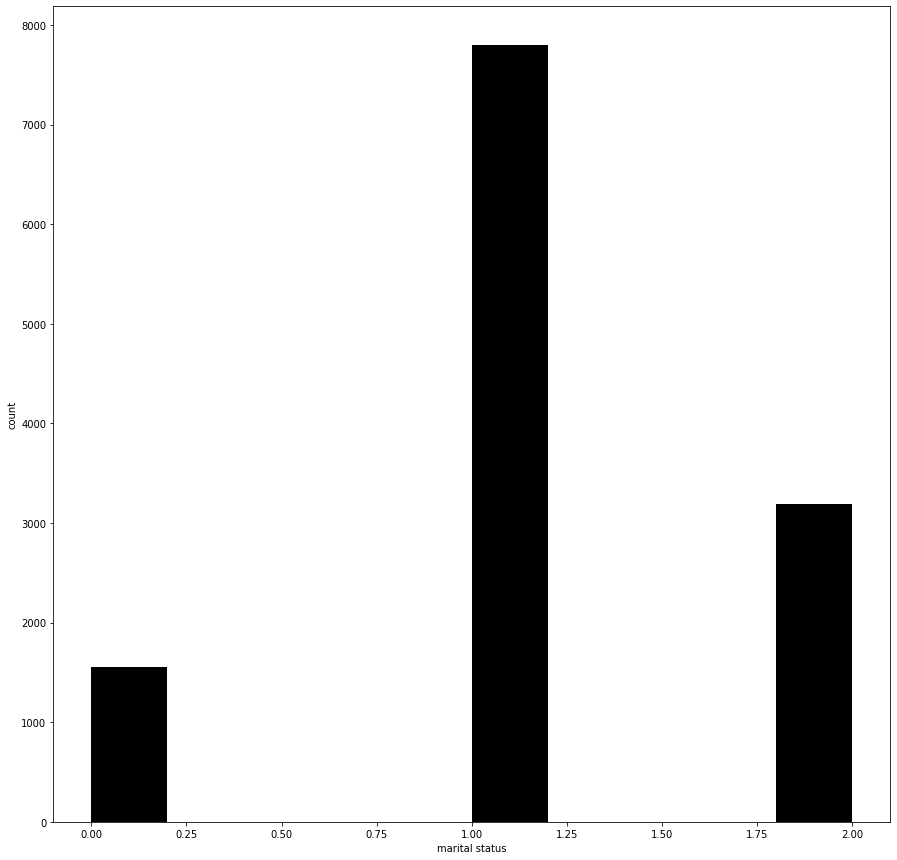

In [62]:
fig=plt.figure(figsize=(15,15))
plt.hist(bank.marital,color='black')
plt.xlabel('marital status')
plt.ylabel('count')
plt.show()

### Observation of this plot
#### We can observe the count of marital people who are married = 1, divorced = 0, single = 2, around 1600 people who are divorced and 7500 appx people who are married and 3000 people who are single



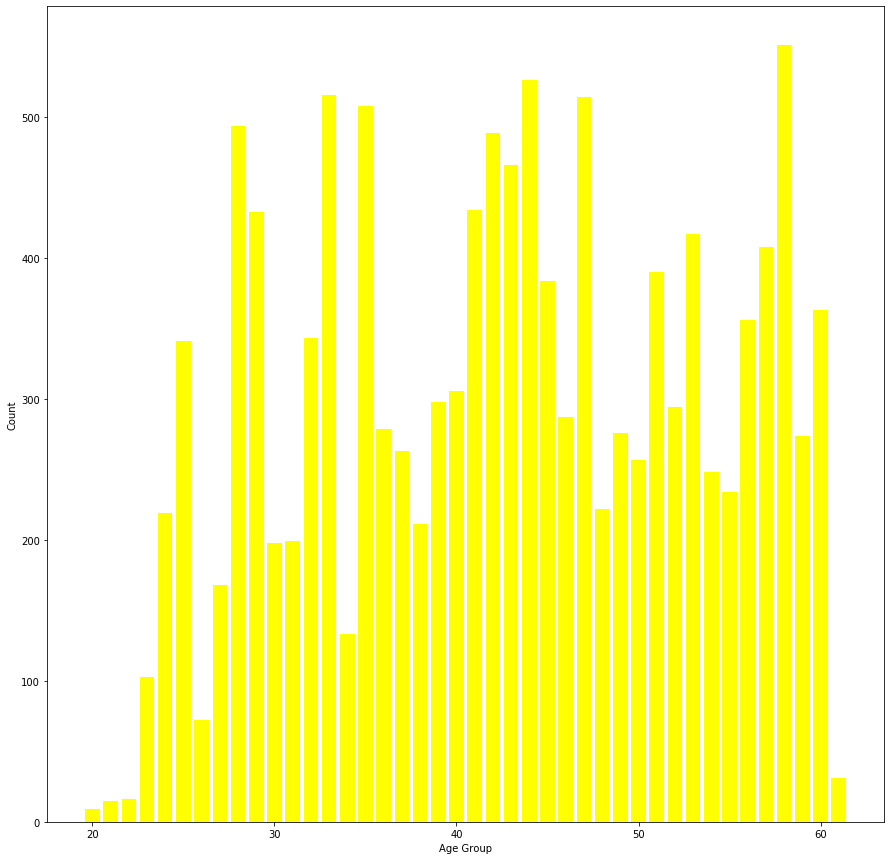

In [59]:
fig=plt.figure(figsize=(15,15))
plt.bar(bank.age.unique(),bank.age.value_counts().values,color='yellow')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Observation of this plot

#### This shows the count of number of people in each age range, maximum are in 58 age and minimum are below 20

In [21]:
import seaborn as sns

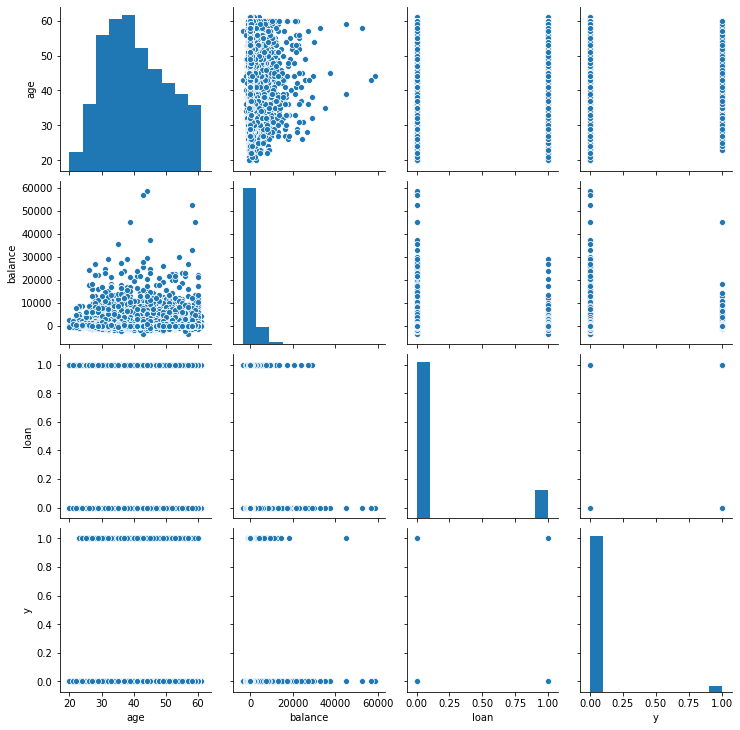

In [28]:
sns.pairplot(bank[['age','balance','loan','y']])

### Observation of this plot

#### Balance is shown in pair plot for different age people and it shows the number of people who have taken loan and number of people who have subscribed to term deposit

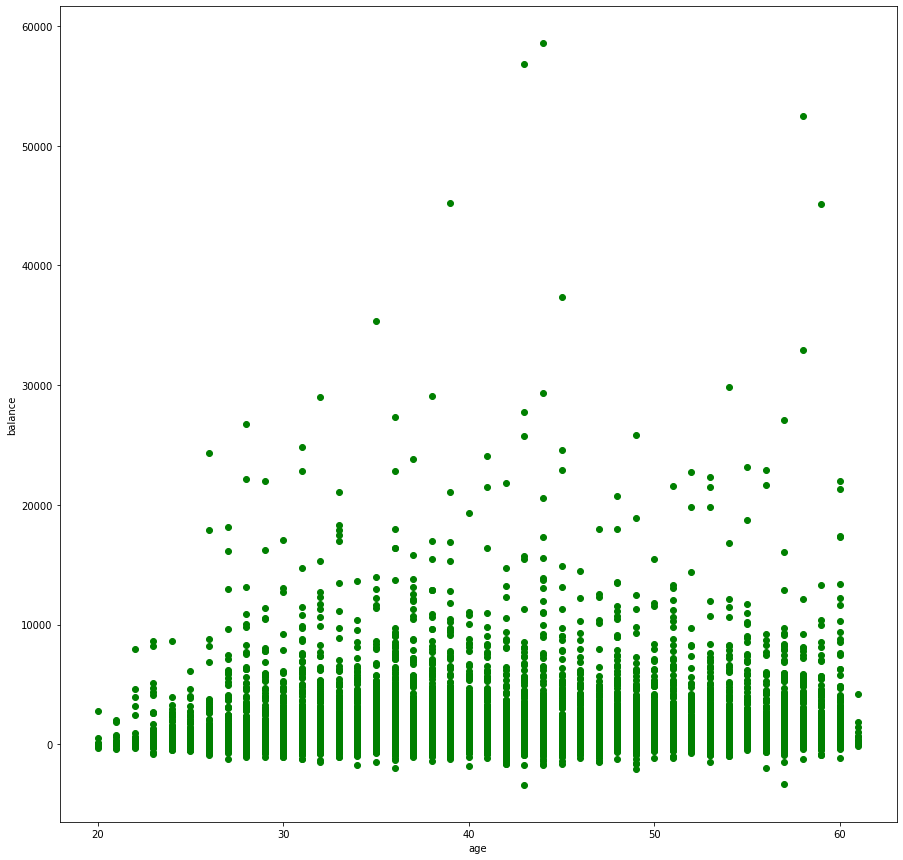

In [60]:
fig=plt.figure(figsize=(15,15))
plt.scatter(bank.age,bank.balance,color='green')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

### Observation of this plot

#### This is  a scatter plot which shows various age people with balance in the bank.

# III. Conclusions

### The challenge what I faced is in converting categorical data into numerical data and to implement it using cat codes, understanding normalization of data, segregating categorical and numerical data.

### Trying to understand how to plot the data.

### Various plotting techniques.


# References


### Data taken from UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Understood plotting using pandas at : https://matplotlib.org/

### https://numpy.org/

### https://pandas.pydata.org/docs/

### https://stackoverflow.com/

### https://seaborn.pydata.org/